In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# aha manually reading each csv
df_budget = pd.read_csv("raw/Budget_balance.csv")
df_burea = pd.read_csv("raw/Bureaucracy_Quality.csv")
df_CAXGS = pd.read_csv("raw/CAXGS.csv")
df_comp = pd.read_csv("raw/Composite.csv")
df_corrup = pd.read_csv("raw/Corruption.csv")
df_curr_ac = pd.read_csv("raw/Current_account.csv")
df_debt = pd.read_csv("raw/Debt_service_risk.csv")
df_demo_ac = pd.read_csv("raw/Democratic_accountability.csv")
df_ethnic = pd.read_csv("raw/Ethnic_tension.csv")
df_exch_rat = pd.read_csv("raw/Exchange_Rate_Stability.csv")
df_external_conf = pd.read_csv("raw/External_Conflict.csv")
df_for_debt = pd.read_csv("raw/Foreign_Debt.csv")
# df_gdp_per_cap = pd.read_csv("DATA/GDP_per_capita.csv") # excluded as these are risk indecies
# df_gdp_growth = pd.read_csv("DATA/GDPGrowth.csv")
df_inflation = pd.read_csv("raw/Inflation.csv")
df_int_liq = pd.read_csv("raw/International_Liquidity.csv")
df_law_ord = pd.read_csv("raw/Law_and_order.csv")
df_mil_pol = pd.read_csv("raw/Military_in_politics.csv")
df_reli_tension = pd.read_csv("raw/Religious_tensions.csv")
df_gov_stability = pd.read_csv("raw/Government_Stability.csv")
df_soc_eco = pd.read_csv("raw/Socioeconomic_Conditions.csv")
df_internal_conf = pd.read_csv("raw/Internal_Conflict.csv")
df_inv_prof = pd.read_csv("raw/Investment_Profile.csv")
df_GDP = pd.read_csv("raw/GDP_data.csv")
df_GDP_per_capita = pd.read_csv("raw/Country_GDP_Per_capita(Current_USD).csv")
df_GDP_growth = pd.read_csv("raw/GDP_Growth_Data.csv")
df_population = pd.read_csv("raw/Population.csv")

In [3]:
# using entire dataset
all_df = [df_budget, df_burea, df_CAXGS, df_comp, df_corrup, df_curr_ac, df_debt, df_demo_ac, df_ethnic,
          df_exch_rat, df_external_conf, df_inflation, df_int_liq, df_law_ord, df_mil_pol, df_reli_tension,
          df_GDP, df_GDP_per_capita, df_GDP_growth, df_population, df_gov_stability, df_soc_eco, df_internal_conf, df_inv_prof, df_for_debt]
features = ["Budget_Balanace", "Bureaucracy_Quality", "CAXGS", "Composite", "Corruption", "CACC", "DebtServ", 
            "Democratic_Accountability", "Ethnic_Tension", "Exchange_Rate", "External_Conflict", "Inflation",
            "International_Liquidity", "Law_Order", "Military_Politic", "Religious_Tension", "GDP", "GDP_Per_Capita", "GDP_Growth", "Population",
            "Government_Stability", "Socioeconomic_Conditions", "Internal_Conflict", "Investment_Profile", "Foreign_Debt"]

In [4]:
df_GDP.rename(columns={"Country Name": "Country"}, inplace=True)
df_GDP_per_capita.rename(columns={"Country Name": "Country"}, inplace=True)
df_GDP_growth.rename(columns={"Country Name": "Country"}, inplace=True)
df_population.rename(columns={"Country Name": "Country"}, inplace=True)
df_GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN


In [5]:
# making list with all the data for a given year
df_list = []
for year in range(1984, 2023):
    df_GDP_temp = df_GDP[["Country", str(year)]].copy()
    df_GDP_temp.rename(columns={str(year): "GDP"}, inplace=True)

    # Start with df_GDP_temp for merging
    df_merged = df_GDP_temp.copy()

    # Merge with each DataFrame in all_df for the current year
    for i in range(len(all_df)):
        df_temp = all_df[i][["Country", str(year)]].copy()
        df_temp.rename(columns={str(year): features[i]}, inplace=True)

        # Merge progressively
        df_merged = pd.merge(df_merged, df_temp, on="Country", how="inner")

    # Add the 'Year' column
    df_merged['Year'] = year

    # Append the final merged DataFrame for the current year
    df_list.append(df_merged)

# Optionally concatenate all yearly DataFrames into one DataFrame
final_df = pd.concat(df_list, ignore_index=True)

final_df.head()

,Country,GDP_x,Budget_Balanace,Bureaucracy_Quality,CAXGS,Composite,Corruption,CACC,DebtServ,Democratic_Accountability,...,GDP_y,GDP_Per_Capita,GDP_Growth,Population,Government_Stability,Socioeconomic_Conditions,Internal_Conflict,Investment_Profile,Foreign_Debt,Year
0,Angola,NaN,5.00,2.0,NaN,NaN,3.0,7.50,NaN,2.0,...,NaN,NaN,6.000002,9617702.0,5.33,7.00,2.67,6.0,4.00,1984
1,Albania,1.857338e+09,4.17,1.0,NaN,NaN,4.0,6.25,NaN,4.0,...,1.857338e+09,639.484730,-1.251597,2904429.0,4.83,7.00,10.0,5.0,5.33,1984
2,Argentina,1.129886e+11,2.78,2.0,10.33,38.46,3.67,4.17,0.0,3.67,...,1.129886e+11,3787.470679,1.570739,29832197.0,4.75,4.00,6.17,3.33,1.80,1984
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3272102.0,NaN,NaN,NaN,NaN,NaN,1984
4,Australia,1.935190e+11,7.50,4.0,10.54,84.04,5.0,11.25,8.0,6.0,...,1.935190e+11,12421.473867,4.591711,15579391.0,9.83,8.08,12.0,9.0,8.52,1984


In [6]:
float_features = ["Budget_Balanace", "Bureaucracy_Quality", "CAXGS", "Composite", "Corruption", "CACC", "DebtServ", 
            "Democratic_Accountability", "Ethnic_Tension", "Exchange_Rate", "External_Conflict", "Inflation",
            "International_Liquidity", "Law_Order", "Military_Politic", "Religious_Tension", "GDP_Per_Capita", "GDP_Growth",
            "Government_Stability", "Socioeconomic_Conditions", "Internal_Conflict", "Investment_Profile", "Foreign_Debt"]
int_features = ["Population", "Year"]

In [7]:
# converting objects to correct data_type
final_df.replace(' ', np.nan, inplace=True)

final_df[float_features] = final_df[float_features].astype(float)
final_df[int_features] = final_df[int_features].astype(int)

In [8]:
final_df.rename(columns={"GDP_x": "GDP"}, inplace=True)
final_df.drop(columns=["GDP_y"])

,Country,GDP,Budget_Balanace,Bureaucracy_Quality,CAXGS,Composite,Corruption,CACC,DebtServ,Democratic_Accountability,...,Religious_Tension,GDP_Per_Capita,GDP_Growth,Population,Government_Stability,Socioeconomic_Conditions,Internal_Conflict,Investment_Profile,Foreign_Debt,Year
0,Angola,NaN,5.00,2.0,NaN,NaN,3.00,7.50,NaN,2.00,...,5.0,NaN,6.000002,9617702,5.33,7.00,2.67,6.00,4.00,1984
1,Albania,1.857338e+09,4.17,1.0,NaN,NaN,4.00,6.25,NaN,4.00,...,6.0,639.484730,-1.251597,2904429,4.83,7.00,10.00,5.00,5.33,1984
2,Argentina,1.129886e+11,2.78,2.0,10.33,38.46,3.67,4.17,0.00,3.67,...,5.0,3787.470679,1.570739,29832197,4.75,4.00,6.17,3.33,1.80,1984
3,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3272102,NaN,NaN,NaN,NaN,NaN,1984
4,Australia,1.935190e+11,7.50,4.0,10.54,84.04,5.00,11.25,8.00,6.00,...,6.0,12421.473867,4.591711,15579391,9.83,8.08,12.00,9.00,8.52,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,United States,2.574411e+13,3.33,4.0,10.00,71.75,4.00,10.50,6.00,5.29,...,5.5,77246.673883,1.935496,333271411,6.75,9.42,9.79,12.00,2.67,2022
4598,Uzbekistan,8.114082e+10,5.50,3.0,10.13,73.35,2.54,9.25,8.75,4.00,...,5.5,2276.161233,5.668817,35648100,9.00,9.04,10.71,8.54,6.88,2022
4599,South Africa,4.052709e+11,4.50,2.0,12.25,68.15,2.25,11.50,9.75,5.00,...,5.0,6766.481254,1.910406,59893885,7.00,4.38,9.00,8.00,6.00,2022
4600,Zambia,2.916378e+10,3.25,1.5,12.88,63.50,2.00,12.88,9.38,4.50,...,5.0,1456.901570,5.249622,20017675,7.13,2.08,10.04,7.08,1.88,2022


Text(0.5, 1.0, 'Correlations for Numerical Features')

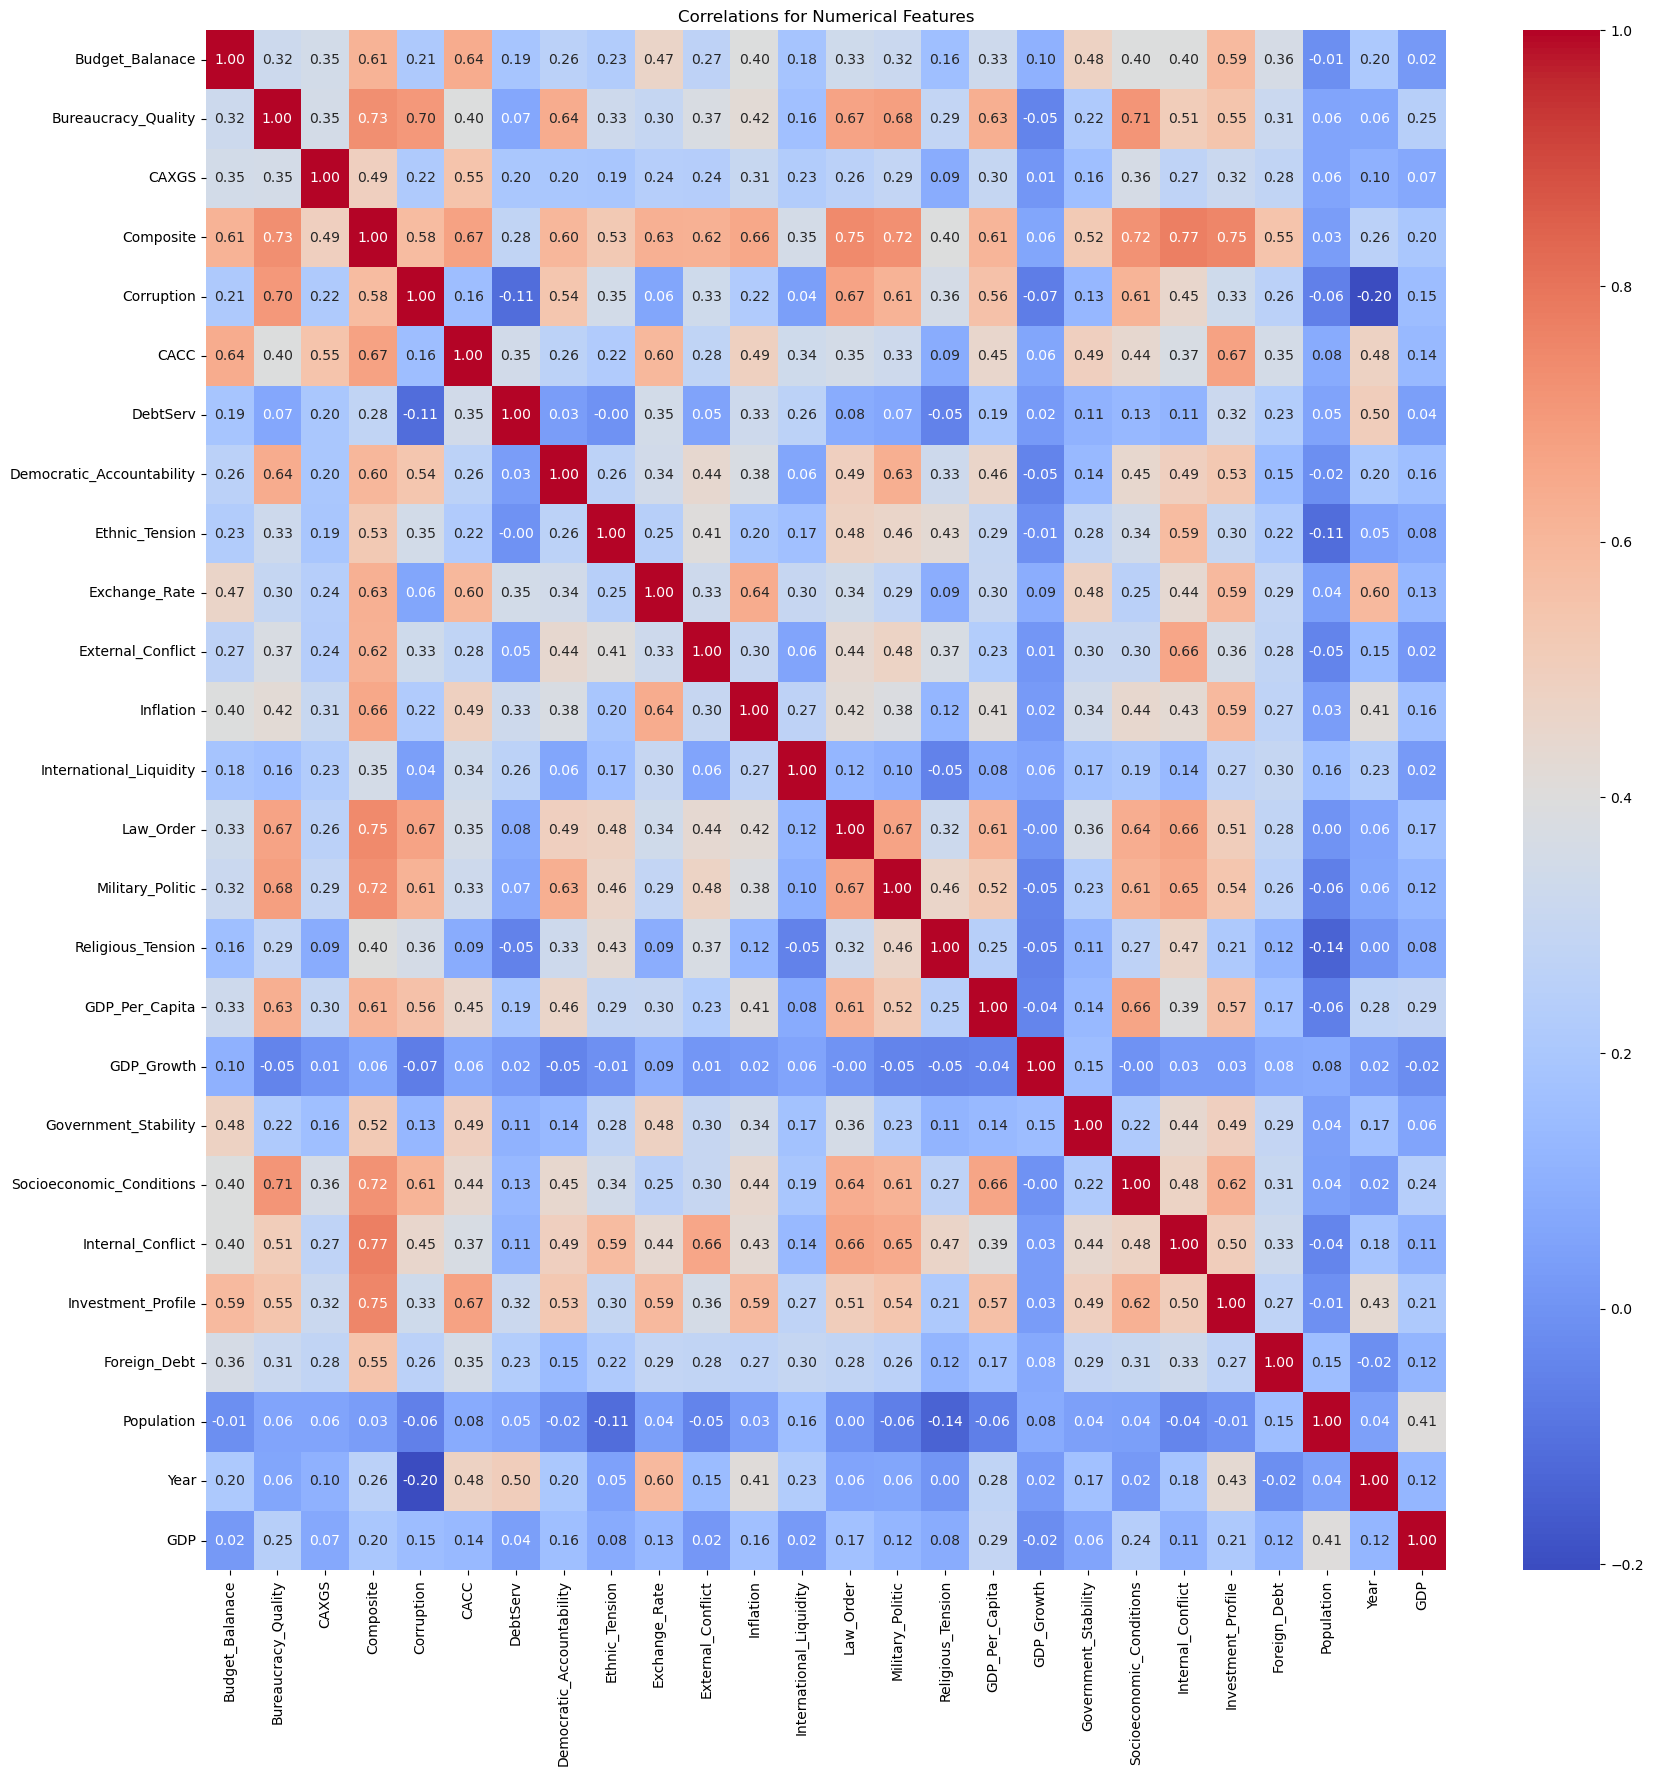

In [12]:
# correlations
import seaborn as sns

numerical_features = float_features + int_features + ["GDP"]
df_numerical = final_df[numerical_features]
corr_matrix = df_numerical.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlations for Numerical Features")

In [9]:
# final_df.to_stata('df_all_features.dta', write_index=False)
# final_df.to_csv('df_all_features.csv')